#Finite Kernel

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


####import package

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

##Dynamic Stiffness Matrix of Arbitrary Matrix

In [249]:
def Ke(node1,node2):
    L=((node1[0]-node2[0])**2+(node1[1]-node2[1])**2+(node1[2]-node2[2])**2)**0.5
    cx=(node2[0]-node1[0])/L*1.
    cy=(node2[1]-node1[1])/L*1.
    cz=(node2[2]-node1[2])/L*1.
#    J=np.matrix([[math.cos(py_angle(La[0],Ga[0])),math.cos(py_angle(La[0],Ga[1])),math.cos(py_angle(La[0],Ga[2])),0,0,0],
#       [math.cos(py_angle(La[1],Ga[0])),math.cos(py_angle(La[1],Ga[1])),math.cos(py_angle(La[1],Ga[2])),0,0,0],
#       [math.cos(py_angle(La[2],Ga[0])),math.cos(py_angle(La[2],Ga[1])),math.cos(py_angle(La[2],Ga[2])),0,0,0],
#       [0,0,0,math.cos(py_angle(La[0],Ga[0])),math.cos(py_angle(La[0],Ga[1])),math.cos(py_angle(La[0],Ga[2]))],
#       [0,0,0,math.cos(py_angle(La[1],Ga[0])),math.cos(py_angle(La[1],Ga[1])),math.cos(py_angle(La[1],Ga[2]))],
#       [0,0,0,math.cos(py_angle(La[2],Ga[0])),math.cos(py_angle(La[2],Ga[1])),math.cos(py_angle(La[2],Ga[2]))]])
    J=np.matrix([[cx,cy,cz,0.,0.,0.],[0.,0.,0.,cx,cy,cz]])
    Ke=J.T*np.matrix([[1.,-1.],[-1.,1.]])*J
    return Ke
#print Ke([0,0,0],[0,1,0])
def D_assemble(numberNode,numberBonds,bondsNodes,nodeCoordinates):
    GDof=numberNode*3
    D=np.matrix([[0. for row in range(0,GDof)] for col in range(0,GDof)]) #initialize D
    for e in range(0,numberBonds):
        numEDOF = 6
        elementDof=[0.,0.,0.,0.,0.,0.]
        for i in range(0,2):
            elementDof[3*i]  =bondsNodes[e][i]*3
            elementDof[3*i+1]=bondsNodes[e][i]*3+1
            elementDof[3*i+2]=bondsNodes[e][i]*3+2
        i,j=0,0
        print elementDof
        for eRow in elementDof:
            for eCol in elementDof:
                #print Ke(nodeCoordinates[bondsNodes[e][0]-1],nodeCoordinates[bondsNodes[e][1]-1])
                k=Ke(nodeCoordinates[bondsNodes[e][0]],nodeCoordinates[bondsNodes[e][1]])[i][0,j]
                #k=np.matrix([[0,1,2,3,4,5],
                #   [6,7,8,9,10,11],
                #   [12,13,14,15,16,17],
                #   [18,19,20,21,22,23],
                #   [24,25,26,27,28,29],
                #   [30,31,32,33,34,35]])[i][0,j]
                #print D
                D[eRow][0,eCol]+=k
                #print bondsNodes[e][0],bondsNodes[e][1],'local:',i,j,'global:',eRow,eCol
                #print D
                j+=1
            j=0
            i+=1
    return D
numberNode=5
numberBonds=4
bondsNodes=[[1,0],[0,2],[0,3],[4,0]]
nodeCoordinates=[[3,3,3],[3,4,3],[4,3,3],[3,2,3],[2,3,3]]
D=D_assemble(numberNode,numberBonds,bondsNodes,nodeCoordinates)
#print D
#print "   0x  0y  0z  1x  1y  1z  2x  2y  2z  3x  3y  3z  4x  4y  4z"

def D

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[3, 4, 5, 0, 1, 2]
[0, 1, 2, 6, 7, 8]
[0, 1, 2, 9, 10, 11]
[12, 13, 14, 0, 1, 2]
[[ 2.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  2.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [117]:
range(0,numberBonds)

[0]

In [66]:
numberElements=4
elementNodes=[[1,2],[2,3],[3,4],[4,1]]
for e in range(0,numberElements):
    numEDOF = 6
    elementDof=[0.,0.,0.,0.,0.,0.]
    for i in range(0,2):
        elementDof[3*i]=elementNodes[e][i]*3-3
        elementDof[3*i+1]=elementNodes[e][i]*3-2
        elementDof[3*i+2]=elementNodes[e][i]*3-1

[9, 10, 11, 0.0, 0.0, 0.0]
[9, 10, 11, 0, 1, 2]


##Kernel Function Calculator

In [5]:
def FiniteKernel(DV,DVRf,TCut,Tstep,m=1.0,k=1.0,syms='_'):
#------------------------------initialize---------------------------
    nts=int(TCut/Tstep)
    timeSeries = np.linspace(0,TCut,nts)
    kernel1 = []
    kernelN = []
#-----------------------------find kernel---------------------------
    [l,X]=np.linalg.eig(DV)
    dof=l.size
    for i in range(0,dof):
        l[i]**=.5
    sinF=lambda w,dt:np.sin(w*dt)/w
    for dt in timeSeries:
        thetaF = []
        for i in range(0,dof):
            thetaF.append(sinF(l[i],dt))
        thetaF=np.diag(thetaF)
        #kernel1.append(float(X.T*thetaF*X*DVRf*k/m))
        #kernelN.append(float(X.T*thetaF*X*DVRf*k/m)) 
        kernel1.append(float(DVRf[0]*X*thetaF*X.T*DVRf[0].T))
        kernelN.append(float(DVRf[0]*X*thetaF*X.T*(DVRf.T)[-1].T))
    #print 'DVRf:',(DVRf.T)[-1].T
    l.sort()
    print 'w:',l
    return kernel1,kernelN,timeSeries



## Finite-Kernel of 2D Lattice Square

w: [ 1.41555408  1.41956295  1.42620258  1.43541148  1.44710608  1.46118293
  1.47752139  1.4959865   1.51643191  1.53870276  1.56263843  1.58807499
  1.61484739  1.64279134  1.67174482  1.70154931  1.73205081  1.76310048
  1.79455517  1.82627774  1.85813724  1.89000895  1.92177436  1.95332109
  1.98454274  2.01533871  2.04561402  2.07527909  2.10424955  2.13244601
  2.15979388  2.18622317  2.21166831  2.23606798  2.25936494  2.28150592
  2.30244144  2.32212573  2.34051657  2.35757527  2.37326649  2.38755822
  2.40042171  2.41183137  2.42176474  2.43020246  2.4371282   2.44252865
  2.44639347  2.44871531]


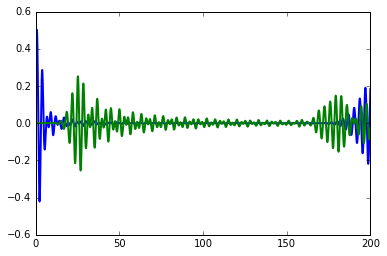

In [7]:
N=11
[kernel1,kernelN,ts]=FiniteKernel(D_square(50,'V',1.0,1.0),D_square(50,'VR_F',1.0,1.0),200,0.001)

plt.plot(ts, kernel1,ts, kernelN, '-', linewidth=2)

plt.show()